# Predicción de insuficiencia cardíaca

In [21]:
# Importamos librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Datos
Data = pd.read_csv("../Data/heart.csv")

In [4]:
df = pd.DataFrame(Data)

In [5]:
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
# Codificar variables categóricas
col_categoricas = ['Sex', 
                   'ChestPainType', 
                   'RestingECG',
                   'ExerciseAngina', 
                   'ST_Slope']

label_encoders = {}

for col in col_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Separar características y etiquetas
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
print(pd.DataFrame(X_scaled, columns=X.columns).head(4))

        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140  0.515952       0.229032   0.410909     0.825070  -0.551341   
1 -0.478484 -1.938163       1.275059   1.491752    -0.171961  -0.551341   
2 -1.751359  0.515952       0.229032  -0.129513     0.770188  -0.551341   
3 -0.584556 -1.938163      -0.816995   0.302825     0.139040  -0.551341   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0    0.017255  1.382928       -0.823556 -0.832432  1.052114  
1    0.017255  0.754157       -0.823556  0.105664 -0.596078  
2    1.601219 -1.525138       -0.823556 -0.832432  1.052114  
3    0.017255 -1.132156        1.214246  0.574711 -0.596078  


In [14]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [18]:
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Predecir en el conjunto de prueba
y_pred_knn = model.predict(X_test)

In [51]:
# Evaluar el modelo KNN
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión del modelo (Accuracy):", accuracy_knn)

Precisión del modelo (Accuracy): 0.8913043478260869


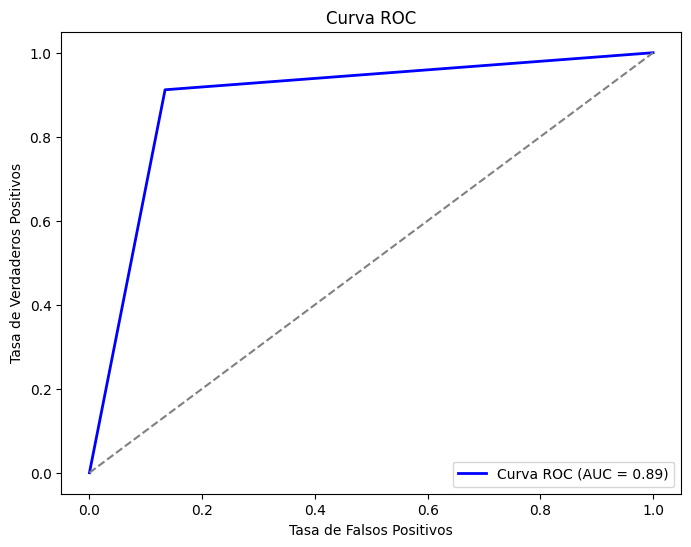

In [24]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

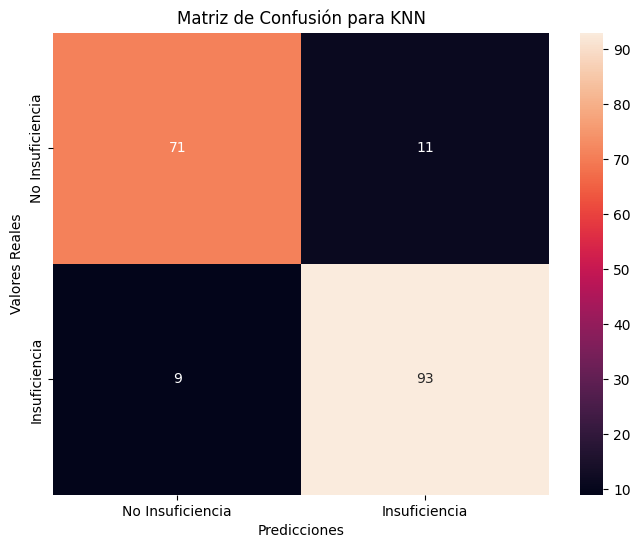

In [33]:
# Matriz de confusion para KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", xticklabels=["No Insuficiencia", "Insuficiencia"], yticklabels=["No Insuficiencia", "Insuficiencia"])
plt.title("Matriz de Confusión para KNN")
plt.ylabel("Valores Reales")
plt.xlabel("Predicciones")
plt.show()

## Red Neuronal

In [36]:
#Libreria necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
# Crear la arquitectura de la ANN
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Capa oculta 1
    Dropout(0.5),                                              # Regularización
    Dense(32, activation='relu'),                              # Capa oculta 2
    Dropout(0.5),                                               # Regularización
    Dense(1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Entrenar la ANN
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5239 - loss: 0.7621 - val_accuracy: 0.7228 - val_loss: 0.6377
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6733 - loss: 0.6510 - val_accuracy: 0.8152 - val_loss: 0.5509
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5722 - val_accuracy: 0.8478 - val_loss: 0.4818
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7859 - loss: 0.5143 - val_accuracy: 0.8641 - val_loss: 0.4293
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7791 - loss: 0.4997 - val_accuracy: 0.8641 - val_loss: 0.3950
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7659 - loss: 0.4788 - val_accuracy: 0.8750 - val_loss: 0.3749
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7969 - loss: 0.4712 - val_accuracy: 0.8641 - val_loss: 0.3651
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4223 - val_accuracy: 0.8696 - val_loss

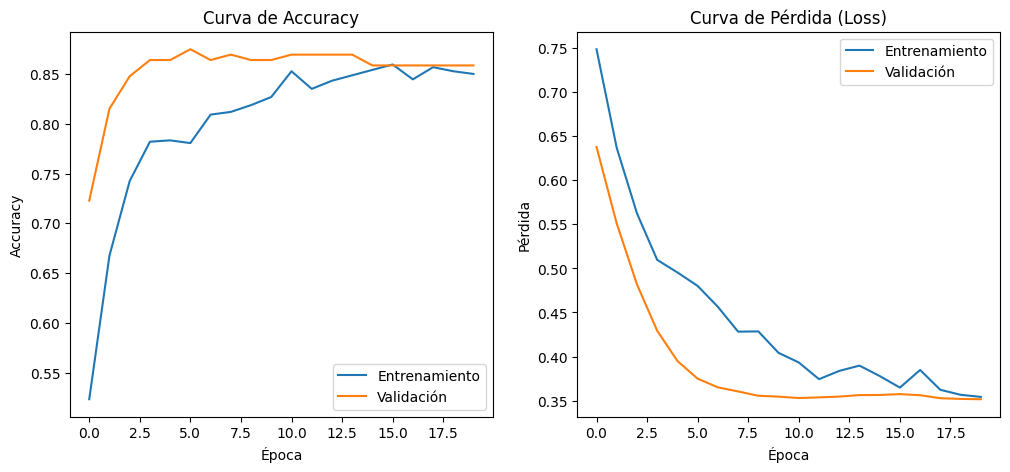

In [40]:
# Graficar las curvas de accuracy y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Accuracy')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [42]:
# Evaluar la ANN en el conjunto de prueba
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)
print("Precisión de la ANN:", accuracy_score(y_test, y_pred_ann))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Precisión de la ANN: 0.8586956521739131


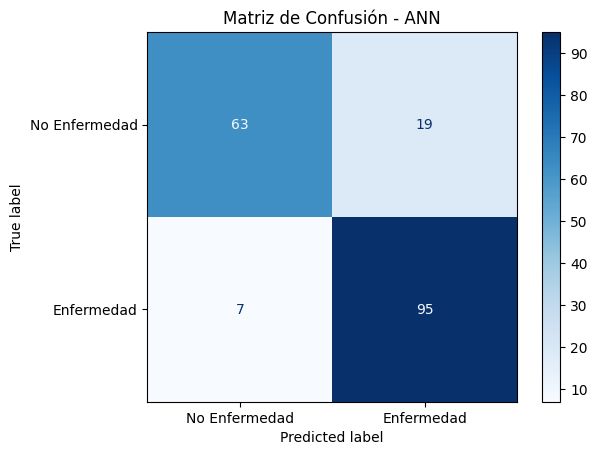

In [62]:
# Matriz de confusión para la ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=['No Enfermedad', 'Enfermedad'])
disp_ann.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - ANN')
plt.show()

In [50]:
# Comparar con el KNN
print("Precisión del KNN:", accuracy_score(y_test, y_pred_knn))
print("Precisión de la ANN:",  accuracy_score(y_test, y_pred_ann))

Precisión del KNN: 0.8913043478260869
Precisión de la ANN: 0.8586956521739131


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


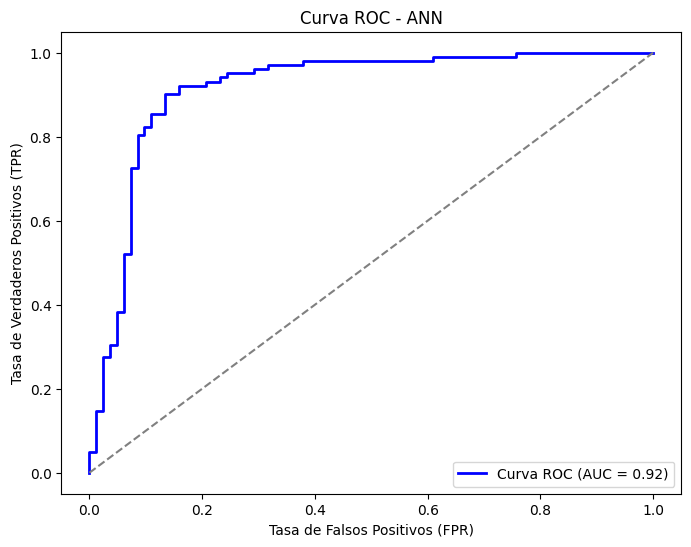

In [45]:
# # Calcular la curva ROC
y_pred_proba_ann = model.predict(X_test)

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)
# Calcular el área bajo la curva ROC (AUC)
roc_auc_ann = roc_auc_score(y_test, y_pred_proba_ann)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia para un modelo aleatorio
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - ANN')
plt.legend(loc='lower right')
plt.show()

In [59]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Precisión del modelo ANN (Accuracy):", accuracy_ann)

Precisión del modelo ANN (Accuracy): 0.8586956521739131
